In [2]:
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA, randomized_svd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.multioutput import MultiOutputClassifier
from sklearn.model_selection import train_test_split
import numpy as np
from matplotlib import cm
import matplotlib.pyplot as plt
import typing
%matplotlib inline

# examine the dataset

In [3]:
df = pd.read_csv('data/training.csv')
df.head()

,class,BrdIndx,Area,Round,Bright,Compact,ShpIndx,Mean_G,Mean_R,Mean_NIR,...,SD_NIR_140,LW_140,GLCM1_140,Rect_140,GLCM2_140,Dens_140,Assym_140,NDVI_140,BordLngth_140,GLCM3_140
0,car,1.27,91,0.97,231.38,1.39,1.47,207.92,241.74,244.48,...,26.18,2.00,0.50,0.85,6.29,1.67,0.70,-0.08,56,3806.36
1,concrete,2.36,241,1.56,216.15,2.46,2.51,187.85,229.39,231.20,...,22.29,2.25,0.79,0.55,8.42,1.38,0.81,-0.09,1746,1450.14
2,concrete,2.12,266,1.47,232.18,2.07,2.21,206.54,244.22,245.79,...,15.59,2.19,0.76,0.74,7.24,1.68,0.81,-0.07,566,1094.04
3,concrete,2.42,399,1.28,230.40,2.49,2.73,204.60,243.27,243.32,...,13.51,3.34,0.82,0.74,7.44,1.36,0.92,-0.09,1178,1125.38
4,concrete,2.15,944,1.73,193.18,2.28,4.10,165.98,205.55,208.00,...,15.65,50.08,0.85,0.49,8.15,0.23,1.00,-0.08,6232,1146.38


In [4]:
df['class'].unique()

array(['car ', 'concrete ', 'tree ', 'building ', 'asphalt ', 'grass ',
       'shadow ', 'soil ', 'pool '], dtype=object)

Totally, we have 9 classes

## translate the labels

In [5]:
y_in_ohc = pd.get_dummies(df['class'])
y_in_ohc.head()

,asphalt,building,car,concrete,grass,pool,shadow,soil,tree
0,0,0,1,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0


In [6]:
df.shape

(168, 148)

For each class, there are 148 features.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Columns: 148 entries, class to GLCM3_140
dtypes: float64(133), int64(14), object(1)
memory usage: 194.4+ KB


In [8]:
df.isnull().sum().sum()

0

No missing value

In [9]:
type(df['class'].unique())

numpy.ndarray

<AxesSubplot:>

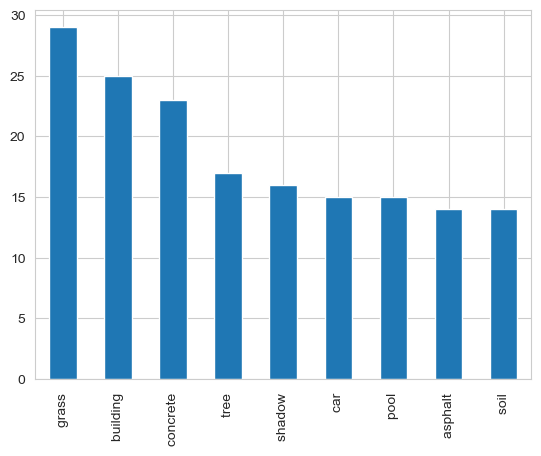

In [10]:
df['class'].value_counts().plot.bar()

For each category, there are only 15 to 30 samples, which means features is more than the observations.

# plot the data

In [11]:
pca = PCA()
data_pca = pca.fit_transform(df.iloc[:, 1:], df['class'])
data_pca = pd.DataFrame(data_pca)

In [12]:
variance_table_pca = pd.DataFrame({'variance': pca.explained_variance_ratio_,
              'cumulative variance': pca.explained_variance_ratio_.cumsum()}).T
variance_table_pca

,0,1,2,3,4,5,6,7,8,9,...,137,138,139,140,141,142,143,144,145,146
variance,0.829064,0.066809,0.030887,0.022003,0.016059,0.009044,0.008212,0.005737,0.004473,0.002219,...,7.046709e-33,7.046709e-33,7.046709e-33,7.046709e-33,7.046709e-33,7.046709e-33,7.046709e-33,7.046709e-33,7.046709e-33,7.046709e-33
cumulative variance,0.829064,0.895873,0.926760,0.948763,0.964822,0.973866,0.982079,0.987815,0.992289,0.994508,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [13]:
plot_pca = pd.concat([df.iloc[:,0], data_pca.iloc[:,:3]], axis=1)
plot_pca

,class,0,1,2
0,car,-9384.337536,439.951506,-2907.512889
1,concrete,4668.577863,-886.067393,-442.514673
2,concrete,102.184955,-2317.924370,-398.668910
3,concrete,9694.995775,-1945.714129,-1374.772477
4,concrete,18126.640584,3237.253970,1936.137565
...,...,...,...,...
163,car,-9231.924543,527.880856,-1944.554404
164,soil,-1827.451573,2114.447897,-557.576197
165,grass,685.298654,211.802160,1228.270984
166,grass,-6950.020256,-233.235668,719.509592


Text(0.5, 1.0, '2D data plot based on first two PCA component')

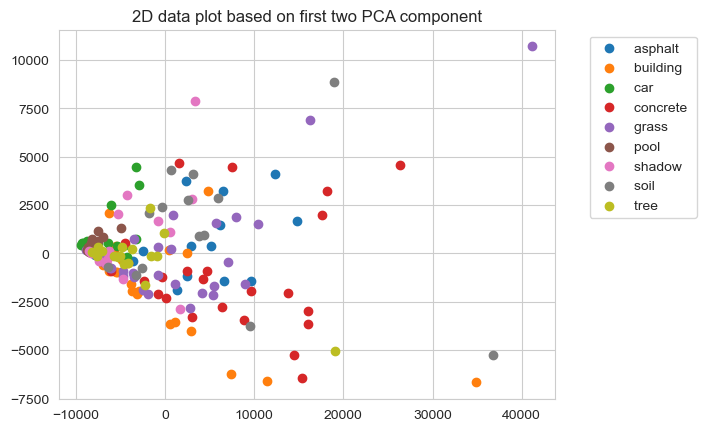

In [14]:
groups = plot_pca.groupby('class')
fig, ax = plt.subplots()
for name, group in groups:
    ax.scatter(group.iloc[:,1], group.iloc[:,2], label=name)
ax.legend(loc='upper right', bbox_to_anchor=(1.3,1))
ax.set_title('2D data plot based on first two PCA component')

Text(0.5, 0.92, '3D data plot based on first two PCA component')

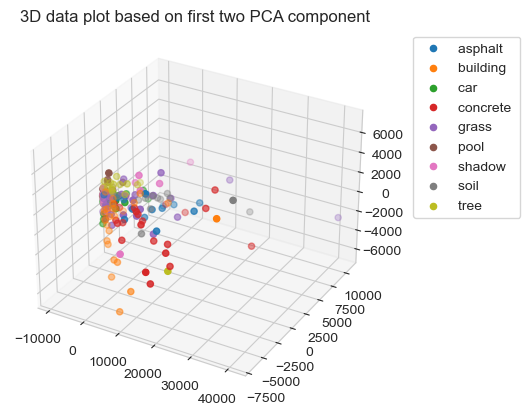

In [15]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
for name, group in groups:
    ax.scatter(group.iloc[:, 1], group.iloc[:, 2], group.iloc[:, 3], label=name)
ax.legend(loc='upper right', bbox_to_anchor=(1.4, 1))
ax.set_title('3D data plot based on first two PCA component')

The plot doesn't look good, most of the points crowd together. This may cause be the magnitudes of some features.

In [16]:
df.describe()

,BrdIndx,Area,Round,Bright,Compact,ShpIndx,Mean_G,Mean_R,Mean_NIR,SD_G,...,SD_NIR_140,LW_140,GLCM1_140,Rect_140,GLCM2_140,Dens_140,Assym_140,NDVI_140,BordLngth_140,GLCM3_140
count,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,...,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000
mean,2.008512,565.869048,1.132976,165.569821,2.077679,2.229881,161.577083,163.672440,171.459226,10.131369,...,23.769881,3.098274,0.796488,0.665000,7.795536,1.594405,0.615357,0.014583,983.309524,1275.292917
std,0.634807,679.852886,0.489150,61.883993,0.699600,0.703572,63.407201,71.306748,67.973969,5.179409,...,12.836522,6.101883,0.103930,0.179086,0.670491,0.460627,0.239900,0.153677,880.013745,603.658611
min,1.000000,10.000000,0.020000,37.670000,1.000000,1.060000,30.680000,32.210000,40.120000,4.330000,...,4.020000,1.000000,0.330000,0.240000,6.290000,0.230000,0.070000,-0.360000,56.000000,336.730000
25%,1.537500,178.000000,0.787500,133.977500,1.547500,1.700000,91.040000,101.187500,120.165000,6.770000,...,13.965000,1.395000,0.757500,0.560000,7.357500,1.325000,0.460000,-0.080000,320.000000,817.405000
50%,1.920000,315.000000,1.085000,164.485000,1.940000,2.130000,187.560000,160.615000,178.345000,8.010000,...,21.135000,1.740000,0.810000,0.690000,7.790000,1.660000,0.620000,-0.040000,776.000000,1187.025000
75%,2.375000,667.000000,1.410000,221.895000,2.460000,2.680000,210.940000,234.815000,236.002500,11.500000,...,29.957500,2.285000,0.870000,0.810000,8.260000,1.945000,0.810000,0.120000,1412.500000,1588.427500
max,4.190000,3659.000000,2.890000,244.740000,4.700000,4.300000,246.350000,253.080000,253.320000,36.400000,...,60.020000,51.540000,0.950000,0.980000,9.340000,2.340000,1.000000,0.350000,6232.000000,3806.360000


try standardize dataset

In [17]:
scaler = StandardScaler()
data_standardized = scaler.fit_transform(df.iloc[:, 1:])

In [18]:
pca = PCA()
data_standardized_pca = pca.fit_transform(data_standardized)

In [19]:
df.iloc[:, 1:25]

,BrdIndx,Area,Round,Bright,Compact,ShpIndx,Mean_G,Mean_R,Mean_NIR,SD_G,...,Rect,GLCM2,Dens,Assym,NDVI,BordLngth,GLCM3,BrdIndx_40,Area_40,Round_40
0,1.27,91,0.97,231.38,1.39,1.47,207.92,241.74,244.48,21.41,...,0.87,6.23,1.60,0.74,-0.08,56,4219.69,1.33,97,1.12
1,2.36,241,1.56,216.15,2.46,2.51,187.85,229.39,231.20,6.57,...,0.63,6.35,1.55,0.69,-0.10,156,3682.08,3.01,1188,1.45
2,2.12,266,1.47,232.18,2.07,2.21,206.54,244.22,245.79,6.16,...,0.78,6.19,1.88,0.19,-0.08,144,2943.35,2.32,1095,1.50
3,2.42,399,1.28,230.40,2.49,2.73,204.60,243.27,243.32,5.76,...,0.74,6.28,1.51,0.83,-0.09,218,3550.19,3.16,4009,2.28
4,2.15,944,1.73,193.18,2.28,4.10,165.98,205.55,208.00,11.46,...,0.59,7.36,0.63,0.99,-0.11,504,2300.41,2.15,944,1.73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,1.43,39,1.41,234.03,1.54,1.60,206.36,246.05,249.69,15.48,...,0.75,5.47,1.40,0.60,-0.09,40,6040.96,1.53,60,1.22
164,1.92,141,1.24,215.19,2.02,2.02,212.28,216.28,217.00,6.82,...,0.78,6.24,1.79,0.46,-0.01,96,3873.35,1.71,263,0.97
165,2.97,252,1.73,164.13,3.20,3.09,184.15,152.03,156.22,7.22,...,0.61,6.48,1.55,0.26,0.10,196,3155.18,2.75,728,1.45
166,1.57,216,1.27,164.84,1.71,1.97,192.55,148.34,153.62,9.99,...,0.77,6.73,1.26,0.92,0.13,116,2401.53,1.88,622,1.85


In [20]:
pd.DataFrame({'variance': pca.explained_variance_ratio_,
              'cumulative variance': pca.explained_variance_ratio_.cumsum()})

,variance,cumulative variance
0,2.287881e-01,0.228788
1,1.999516e-01,0.428740
2,1.216195e-01,0.550359
3,7.980984e-02,0.630169
4,5.599154e-02,0.686161
...,...,...
142,9.859406e-34,1.000000
143,9.859406e-34,1.000000
144,9.859406e-34,1.000000
145,9.859406e-34,1.000000


It needs at least 15 components to cover 90% of the variance.

In [21]:
df_standardized_pca = pd.concat([df['class'], pd.DataFrame(data_standardized_pca)], axis=1)
groups = df_standardized_pca.groupby(by='class')

Text(0.5, 1.0, '2D standard data plot based on first three PCA component')

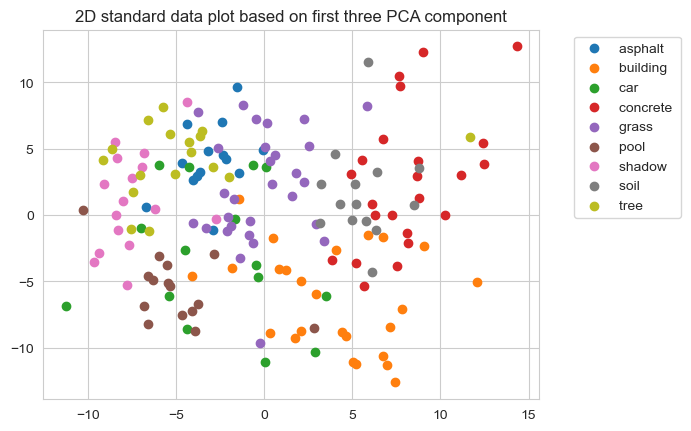

In [22]:
fig = plt.figure()
ax = fig.subplots()
for name, group in groups:
    ax.scatter(group.iloc[:, 1], group.iloc[:, 2], label=name)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
ax.set_title('2D standard data plot based on first three PCA component')

Text(0.5, 0.92, '3D standard data plot based on first three PCA component')

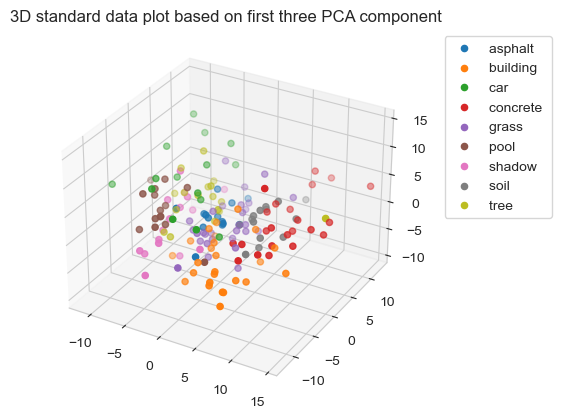

In [23]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
for name, group in groups:
    ax.scatter(group.iloc[:, 1], group.iloc[:, 2], group.iloc[:, 3], label=name)
ax.legend(loc='upper right', bbox_to_anchor=(1.4, 1))
ax.set_title('3D standard data plot based on first three PCA component')

Take first 15 components, which covers around 90% of the variance, to build a multiple logistic regression.

# Modeling with PCA

make PCA dataset

In [24]:
X_train, X_valid, y_train, y_valid = train_test_split(data_standardized, y_in_ohc, train_size=0.9, random_state=42)
pca = PCA().fit(X_train, y_train)

In [25]:
print(X_train.shape, X_valid.shape)

(151, 147) (17, 147)


In [26]:
variance_table_pca = pd.DataFrame({'variance': pca.explained_variance_ratio_,
              'cumulative variance': pca.explained_variance_ratio_.cumsum()}).T
variance_table_pca

,0,1,2,3,4,5,6,7,8,9,...,137,138,139,140,141,142,143,144,145,146
variance,0.231757,0.206228,0.114033,0.079653,0.057407,0.044217,0.036765,0.028361,0.023109,0.022107,...,1.039610e-33,1.039610e-33,1.039610e-33,1.039610e-33,1.039610e-33,1.039610e-33,1.039610e-33,1.039610e-33,1.039610e-33,1.039610e-33
cumulative variance,0.231757,0.437985,0.552018,0.631672,0.689079,0.733296,0.770060,0.798422,0.821530,0.843637,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [27]:
clf = MultiOutputClassifier(LogisticRegression()).fit(pca.transform(X_train)[:, :15], y_train)
y_pred = clf.predict(pca.transform(X_valid)[:, :15])
y_pred.shape

(17, 9)

In [28]:
comp = (np.argmax(y_pred, axis=1) == np.argmax(y_valid.to_numpy(), axis=1))
acc = np.sum(comp)/len(comp)
print('accuracy: {:.4f}%'.format(100* acc))

accuracy: 58.8235%


In [29]:
df_test = pd.read_csv('data/testing.csv')

In [30]:
X_test = StandardScaler().fit_transform(df_test.iloc[:, 1:])
y_test = pd.get_dummies(df_test['class'])

In [31]:
y_pred = clf.predict(pca.transform(X_test)[:, :15])
comp = (np.argmax(y_pred, axis=1) == np.argmax(y_test.to_numpy(), axis=1))
acc = np.sum(comp)/len(comp)
print('accuracy on test data: {:.4f}%'.format(100* acc))

accuracy on test data: 51.4793%


taking 90% of the variance gives the result 58.8235% accuracy

Try taking 95% of the variance, which means first 24 component

In [32]:
clf = MultiOutputClassifier(LogisticRegression()).fit(pca.transform(X_train)[:, :24], y_train)
y_pred = clf.predict(pca.transform(X_valid)[:, :24])
comp = (np.argmax(y_pred, axis=1) == np.argmax(y_valid.to_numpy(), axis=1))
acc = np.sum(comp)/len(comp)
print('accuracy: {:.4f}%'.format(100* acc))

accuracy: 58.8235%


The accuracy didn't improve anymore.

In [33]:
y_pred = clf.predict(pca.transform(X_test)[:, :24])
comp = (np.argmax(y_pred, axis=1) == np.argmax(y_test.to_numpy(), axis=1))
acc = np.sum(comp)/len(comp)
print('accuracy on test data: {:.4f}%'.format(100* acc))

accuracy on test data: 53.8462%


In [34]:
valid_acc = list()
test_acc = list()
num_of_components = np.linspace(1, 50, 50, dtype=np.int32)
for n in num_of_components:
    clf = MultiOutputClassifier(LogisticRegression()).fit(pca.transform(X_train)[:, :n], y_train)
    y_pred = clf.predict(pca.transform(X_valid)[:, :n])
    comp = (np.argmax(y_pred, axis=1) == np.argmax(y_valid.to_numpy(), axis=1))
    valid_acc.append(np.mean(comp))
    y_pred = clf.predict(pca.transform(X_test)[:, :n])
    comp = (np.argmax(y_pred, axis=1) == np.argmax(y_test.to_numpy(), axis=1))
    test_acc.append(np.mean(comp))

(0.0, 1.0)

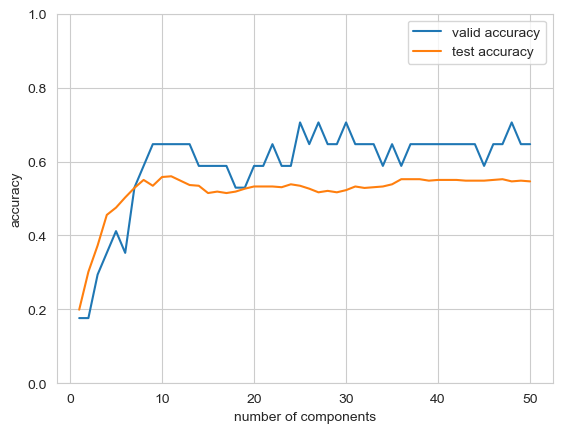

In [35]:
fig = plt.figure()
ax = fig.gca()
ax.plot(num_of_components, valid_acc, label='valid accuracy')
ax.plot(num_of_components, test_acc, label='test accuracy')
ax.set_xlabel('number of components')
ax.set_ylabel('accuracy')
ax.legend()
ax.set_ylim([0, 1])

# Selection by adding threshold to covariance matrix

In [44]:
def selecting_by_thresholding(X: np.ndarray,
                              y: np.ndarray,
                              X_test: np.ndarray,
                              y_test: np.ndarray,
                              cov_matrix: np.ndarray,
                              threshold_array: typing.Iterable,
                              cumulative_variance: int = 0.95) -> typing.Tuple:
    acc_array = list()
    better_model = None
    trans_U = None
    highest_acc = -1
    for t in threshold_array:
        S = cov_matrix.copy()
        S[S < t] = 0
        # eigenvalue decomposition
        U, S, VT = np.linalg.svd(S)
        ratio_of_variances = S / np.sum(S)
        cumulative_variances = np.cumsum(ratio_of_variances)
        index_of_95 = np.argmax(cumulative_variances>cumulative_variance)
        U = U[:, :index_of_95+1]
        # U, S, VT = randomized_svd(S, n_components=n_components)

        # PCA
        pca = np.matmul(X, U)
        # modeling
        model = MultiOutputClassifier(LogisticRegression()).fit(pca, y)
        y_pred = model.predict(np.matmul(X_test, U))
        comp = np.equal(np.argmax(y_pred, axis=1), np.argmax(y_test.to_numpy(), axis=1))
        acc = np.mean(comp)
        acc_array.append(acc)
        if highest_acc < acc:
            better_model = model
            trans_U = U
            highest_acc = acc

    return acc_array, better_model, trans_U, highest_acc

highest accuracy with first 15 components: 0.7647058823529411


Text(0, 0.5, 'accuracy')

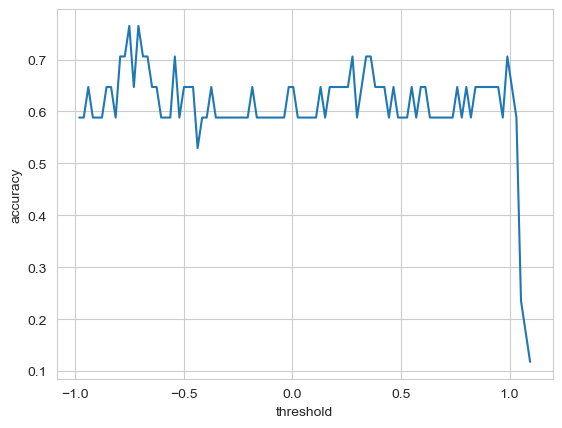

In [45]:
X_train, X_valid, y_train, y_valid = train_test_split(data_standardized, y_in_ohc, train_size=0.9, random_state=42)
cov_matrix = np.cov(X_train, rowvar=False)
lower_bound = np.min(cov_matrix)
upper_bound = np.max(cov_matrix)
threshold_array = np.linspace(lower_bound, upper_bound, 100)
acc_array, better_model, U, highest_acc = selecting_by_thresholding(
    X_train, y_train, X_valid, y_valid, cov_matrix, threshold_array
)
print('highest accuracy with first 15 components: {}'.format(highest_acc))
fig = plt.figure()
ax = fig.gca()
ax.plot(threshold_array, acc_array)
ax.set_xlabel('threshold')
ax.set_ylabel('accuracy')

In [46]:
y_pred = better_model.predict(np.matmul(X_test, U))
comp = np.equal(np.argmax(y_pred, axis=1), np.argmax(y_test.to_numpy(), axis=1))
np.mean(comp)

0.5167652859960552

In [47]:
# acc_array, better_model, U, highest_acc = selecting_by_thresholding(
#     X_train, y_train, X_valid, y_valid, cov_matrix, 24, threshold_array
# )
# print('highest accuracy with first 24 components: {}'.format(highest_acc))
# fig = plt.figure()
# ax = fig.gca()
# ax.plot(threshold_array, acc_array)
# ax.set_xlabel('threshold')
# ax.set_ylabel('accuracy')

In [48]:
# y_pred = better_model.predict(np.matmul(X_test, U))
# comp = np.equal(np.argmax(y_pred, axis=1), np.argmax(y_test.to_numpy(), axis=1))
# np.mean(comp)

In [50]:
# acc_array, better_model, U, highest_acc = selecting_by_thresholding(
#     X_train, y_train, X_valid, y_valid, cov_matrix, threshold_array
# )
# print('highest accuracy with first 30 components: {}'.format(highest_acc))
# fig = plt.figure()
# ax = fig.gca()
# ax.plot(threshold_array, acc_array)
# ax.set_xlabel('threshold')
# ax.set_ylabel('accuracy')

In [51]:
# y_pred = better_model.predict(np.matmul(X_test, U))
# comp = np.equal(np.argmax(y_pred, axis=1), np.argmax(y_test.to_numpy(), axis=1))
# np.mean(comp)

In [62]:
# valid_acc = list()
# test_acc = list()
# num_of_components = np.linspace(1, 50, 50, dtype=np.int32)
# for n in num_of_components:
#     acc_array, better_model, U, highest_acc = selecting_by_thresholding(
#         X_train, y_train, X_valid, y_valid, cov_matrix, n, threshold_array
#     )
#     valid_acc.append(highest_acc)
#     y_pred = better_model.predict(np.matmul(X_test, U))
#     comp = np.equal(np.argmax(y_pred, axis=1), np.argmax(y_test.to_numpy(), axis=1))
#     test_acc.append(np.mean(comp))

In [66]:
# print('''highest valid accuracy: {}
# highest test accuracy: {}'''.format(np.max(valid_acc), np.max(test_acc)))

highest valid accuracy: 0.7647058823529411
highest test accuracy: 0.5641025641025641


(0.0, 1.0)

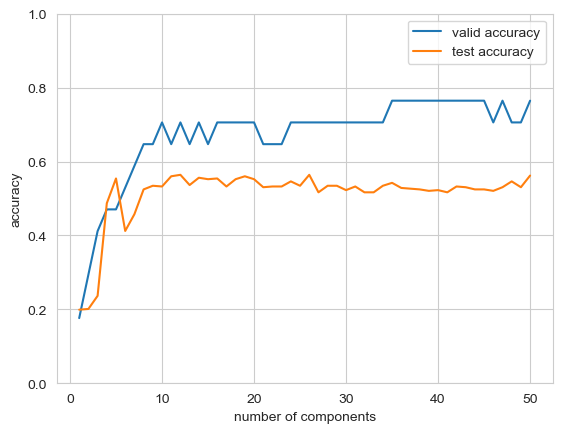

In [63]:
fig = plt.figure()
ax = fig.gca()
ax.plot(num_of_components, valid_acc, label='valid accuracy')
ax.plot(num_of_components, test_acc, label='test accuracy')
ax.set_xlabel('number of components')
ax.set_ylabel('accuracy')
ax.legend()
ax.set_ylim([0, 1])

# model selection by penalization approach

In [32]:
name2num = dict()
for i, n in enumerate(df['class'].unique()):
    name2num[n] = i
y_in_num = df['class'].apply(lambda x: name2num[x])

In [33]:
X_train, X_valid, y_train, y_valid = train_test_split(data_standardized, y_in_ohc, train_size=0.9, random_state=42)

In [34]:
cv_logist = LogisticRegressionCV(Cs=np.logspace(-7, 3), cv=5, penalty='l2', solver='sag', n_jobs=4, max_iter=2000)
clf = cv_logist.fit(X_train, y_train.idxmax(axis=1))


the final coefficients

In [35]:
clf.coef_

array([[ 0.02402613, -0.00137755,  0.00899092, ..., -0.04383052,
         0.02093159,  0.01757872],
       [-0.04096497,  0.14292535, -0.0259443 , ..., -0.05188968,
        -0.04450347, -0.01801371],
       [-0.05667751, -0.03001493, -0.0524019 , ..., -0.00317836,
        -0.00281765,  0.03823506],
       ...,
       [-0.01869976,  0.00946341, -0.01861752, ...,  0.03854041,
        -0.00967791, -0.01089912],
       [ 0.06022901, -0.03662707,  0.03146872, ...,  0.01718127,
         0.07018551,  0.0021732 ],
       [ 0.04501509, -0.02522275,  0.02204857, ...,  0.07360268,
        -0.02310555, -0.03909628]])

Averaging the coefs_paths_ across folds provides a summary of how the coefficients change with different values of the hyperparameter C over all folds
.

Text(0.5, 0, 'penalty')

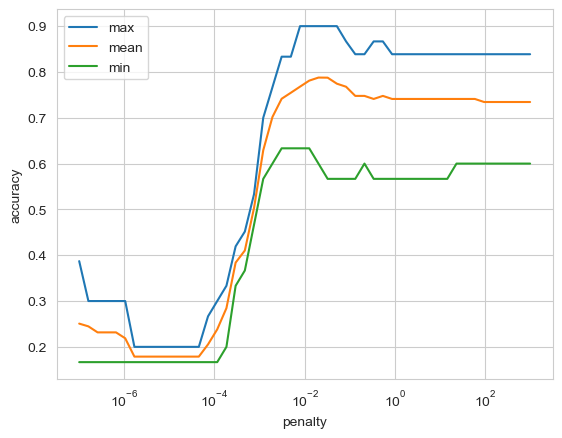

In [82]:
# since multiple classes follow the multinomial distribution, for each class the score is the same.
# [max, mean, min]
scores = {'max': np.max(clf.scores_['car '], axis=0),
          'mean': np.mean(clf.scores_['car '], axis=0),
          'min': np.min(clf.scores_['car '], axis=0)}
fig = plt.figure()
ax = fig.add_subplot()
for k,v in scores.items():
    ax.plot(clf.Cs_, v, label=k)
ax.legend()
ax.set_xscale('log')
ax.set_ylabel('accuracy')
ax.set_xlabel('penalty')

Text(0, 0.5, 'coefficients')

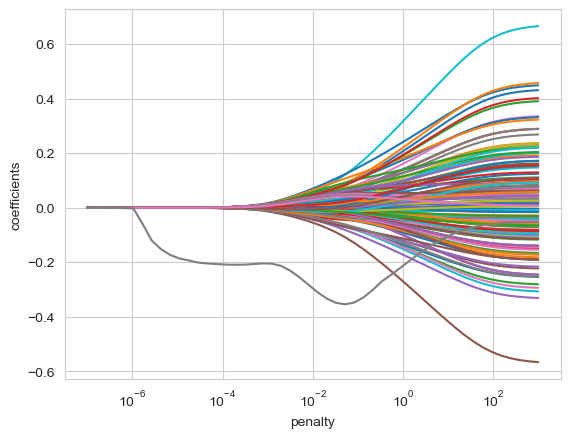

In [81]:
car_path = pd.DataFrame(clf.coefs_paths_['car '].mean(axis=0))
ax = plt.gca()
# car_path.plot(x=clf.Cs, ax=ax, legend=False)
for c in car_path.columns:
    ax.plot(clf.Cs_, car_path[c])
ax.set_xscale('log')
ax.set_xlabel('penalty')
ax.set_ylabel('coefficients')

In [37]:
acc = (clf.predict(X_valid) == y_valid.idxmax(axis=1)).sum() / len(y_valid)
print('accuracy on the valid dataset same as PCA: {:.4f}%'.format(100*acc))

accuracy on the valid dataset same as PCA: 76.4706%


In [38]:
y_pred = clf.predict(X_test)
comp = (y_pred == y_test.idxmax(axis=1)).sum()
acc = np.sum(comp)/len(y_pred)
print('accuracy on test data: {:.4f}%'.format(100* acc))

accuracy on test data: 74.5562%


In [39]:
len(y_pred)

507